In [1]:
import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models
from keras.models import Sequential

from tensorflow.keras.utils import to_categorical
#import mlflow
import time

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

2024-03-01 13:43:11.650385: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 13:43:11.708036: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
batch_size=64
epochs=2

params = {
    "epochs": epochs,
    "batch_size": batch_size,
}
TAG = 'démarrage'

In [3]:
(X_train1, y_train1), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train1.shape, y_train1.shape

((60000, 28, 28), (60000,))

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.16666)
X_val.shape, y_val.shape

((10000, 28, 28), (10000,))

In [7]:
X_train_norm, X_test_norm, X_val_norm = X_train/255, X_test/255, X_val/255

In [8]:
X_val_norm.shape

(10000, 28, 28)

In [9]:
X_train_final = np.reshape(X_train_norm, (50000, 28, 28, 1))
X_test_final = np.reshape(X_test_norm,(10000, 28, 28, 1))
X_val_final = np.reshape(X_val_norm,(10000, 28, 28, 1))

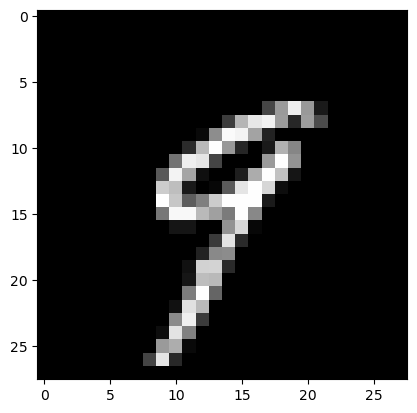

In [10]:
plt.plot()
plt.imshow((X_train_final[0]), cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [12]:
X_val_final.shape

(10000, 28, 28, 1)

In [13]:
#mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
#mlflow.tensorflow.autolog()

In [14]:
# Model / data parameters
num_classes = 10

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start_time = time.time()

history = model.fit(X_train_final,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data=(X_val_final, y_val))

# Fin du chronomètre
end_time = time.time()

# Calcul du temps écoulé en secondes
training_time = end_time - start_time
training_time

2024-03-01 13:43:16.200767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


Epoch 1/2
782/782 [==============================] - 5s 6ms/step - loss: 0.2238 - accuracy: 0.9360 - val_loss: 0.1135 - val_accuracy: 0.9688
Epoch 2/2
782/782 [==============================] - 5s 6ms/step - loss: 0.0788 - accuracy: 0.9779 - val_loss: 0.0917 - val_accuracy: 0.9735


10.475911378860474

In [15]:
loss_test, accuracy_test = model.evaluate(X_test_final, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9763
